In [9]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.autograd import Variable

In [89]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        #nn.Module.__init__() 실행
        super(LinearRegression, self).__init__()
        #nn.linear is defined in nn.Module
        #Applies a linear transformation to the incoming data: :math:`y = xA^T + b`
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        #forward pass => linear function
        out = self.linear(x)
        return out


In [105]:
x_train = torch.tensor([[1],[2],[3]], dtype = torch.float32)
y_train = torch.tensor([[1],[2],[3]], dtype = torch.float32)

x_test = torch.tensor([4, 5, 6], dtype = torch.float32)
y_test = torch.tensor([4,5,6], dtype = torch.float32)

In [106]:
model = LinearRegression(1,1)

#cost 정의_ Mean Squared Loss
#Creates a criterion that measures the mean squared error between n elements in the input x and target y.
cost = nn.MSELoss()

#model의 parameters를 SGD를 통해 learning rate만큼 학습시키겠다.
learning_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = learning_rate)

#data를 200번 돌려서 학습시키겠다.
epochs = 1000

### Training the Model

In [107]:
loss_ = []
outputs_ = []

for epoch in range(1, epochs+1):
    #Variable: Wraps a tensor and records the operations applied to it
    x_train = Variable(x_train)
    y_train = Variable(y_train)
    
    #Clears the gradients of all optimized  tensors (set gradients as 0)
    optimiser.zero_grad()
    
    #forward to get predicted values
    outputs = model.forward(x_train)
    loss = cost(outputs, y_train)
    loss.backward()  #apply backpropagation
    optimiser.step()  #update the parameters
    if epoch % 20 == 0:
        for param in model.parameters():
            print(param.data)
        print('epoch  {}, loss  {}'.format(epoch, loss.item()))

tensor([[0.8942]])
tensor([-0.1459])
epoch  20, loss  0.17095501720905304
tensor([[1.0213]])
tensor([-0.0853])
epoch  40, loss  0.0024488645140081644
tensor([[1.0320]])
tensor([-0.0762])
epoch  60, loss  0.0008385554538108408
tensor([[1.0316]])
tensor([-0.0721])
epoch  80, loss  0.0007490270654670894
tensor([[1.0302]])
tensor([-0.0687])
epoch  100, loss  0.0006801635609008372
tensor([[1.0288]])
tensor([-0.0655])
epoch  120, loss  0.0006177345057949424
tensor([[1.0274]])
tensor([-0.0624])
epoch  140, loss  0.0005610361695289612
tensor([[1.0262]])
tensor([-0.0595])
epoch  160, loss  0.0005095443921163678
tensor([[1.0249]])
tensor([-0.0567])
epoch  180, loss  0.0004627743037417531
tensor([[1.0238]])
tensor([-0.0540])
epoch  200, loss  0.00042030232725664973
tensor([[1.0226]])
tensor([-0.0515])
epoch  220, loss  0.00038172397762537
tensor([[1.0216]])
tensor([-0.0490])
epoch  240, loss  0.00034669029992073774
tensor([[1.0206]])
tensor([-0.0467])
epoch  260, loss  0.0003148678515572101
tenso

In [88]:
for i in model.linear.parameters():
    print(i)

Parameter containing:
tensor([[ 0.1070,  0.3630,  0.0878],
        [-0.1035,  0.6541,  0.2369],
        [ 0.6260,  0.5644,  0.5179]], requires_grad=True)
Parameter containing:
tensor([-0.0963,  0.0844, -0.3085], requires_grad=True)


### Print the Predicted Values

In [108]:
#예측값을 tensor에서 numpy로 바꾸기
predicted = model.forward(Variable(x_train)).data.numpy()

In [109]:
predicted

array([[0.99559  ],
       [1.9990536],
       [3.0025172]], dtype=float32)

OrderedDict([('linear.weight', tensor([[-0.3279,  0.3482,  0.3086],
        [ 0.0886,  0.0237,  0.7685],
        [ 0.2684,  0.4089,  0.4987]])), ('linear.bias', tensor([-0.2943, -0.4413,  0.4178]))])


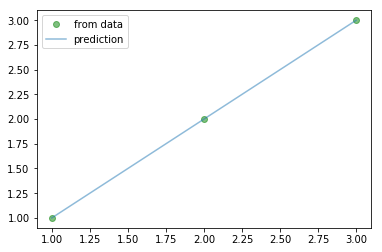

In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train.numpy(), y_train.numpy(), 'go', label = 'from data', alpha = .5)
plt.plot(x_train.numpy(), predicted, label = 'prediction', alpha = 0.5)
plt.legend()
print(model.state_dict())